# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
from datetime import datetime

# Load Dataset

In [2]:
df=pd.read_csv(r"C:\Users\uzuma\Downloads\Uber Request Data.csv")

In [3]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [4]:
df.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


# Data Cleaning

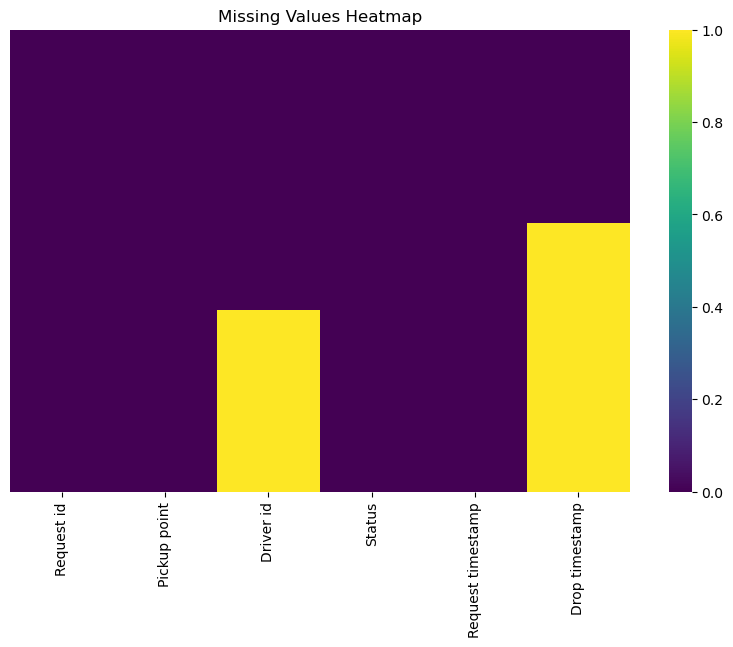

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
for i  in df.select_dtypes(include="O").columns:
    print(f"------valuecounts----{i}")
    print(df[i].value_counts())

------valuecounts----Pickup point
Pickup point
City       3507
Airport    3238
Name: count, dtype: int64
------valuecounts----Status
Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64
------valuecounts----Request timestamp
Request timestamp
11/7/2016 19:02        6
11/7/2016 17:57        6
11/7/2016 8:37         6
11/7/2016 9:40         6
12/7/2016 21:42        5
                      ..
15-07-2016 18:08:33    1
15-07-2016 04:50:54    1
14-07-2016 18:42:23    1
13-07-2016 19:26:50    1
15-07-2016 23:55:03    1
Name: count, Length: 5618, dtype: int64
------valuecounts----Drop timestamp
Drop timestamp
11/7/2016 13:00        4
12/7/2016 21:53        4
12/7/2016 21:04        4
12/7/2016 6:22         4
11/7/2016 18:39        3
                      ..
12/7/2016 5:40         1
12/7/2016 22:42        1
13-07-2016 13:09:40    1
13-07-2016 23:22:35    1
15-07-2016 09:56:07    1
Name: count, Length: 2598, dtype: int64


In [9]:
df["Driver id"]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
6740    NaN
6741    NaN
6742    NaN
6743    NaN
6744    NaN
Name: Driver id, Length: 6745, dtype: float64

In [10]:
df["Driver id"]=df["Driver id"].ffill()

In [11]:
df["Drop timestamp"]=df["Drop timestamp"].ffill()

In [12]:
df["Request timestamp"]

0           11/7/2016 11:51
1           11/7/2016 17:57
2            12/7/2016 9:17
3           12/7/2016 21:08
4       13-07-2016 08:33:16
               ...         
6740    15-07-2016 23:49:03
6741    15-07-2016 23:50:05
6742    15-07-2016 23:52:06
6743    15-07-2016 23:54:39
6744    15-07-2016 23:55:03
Name: Request timestamp, Length: 6745, dtype: object

In [21]:
df['Request timestamp']= df['Request timestamp'].astype(str).str.replace("/",'-')

In [22]:
df['Drop timestamp']= df['Drop timestamp'].astype(str).str.replace("/",'-')

In [23]:
df[['Request timestamp']]

,Request timestamp
0,11-7-2016 11:51
1,11-7-2016 17:57
2,12-7-2016 9:17
3,12-7-2016 21:08
4,13-07-2016 08:33:16
...,...
6740,15-07-2016 23:49:03
6741,15-07-2016 23:50:05
6742,15-07-2016 23:52:06
6743,15-07-2016 23:54:39


In [24]:
from datetime import datetime
from dateutil import parser

In [25]:
df['Request timestamp'] = df['Request timestamp'].apply(lambda x: parser.parse(x))
df['Request timestamp']= pd.to_datetime(df['Request timestamp'],format='%d-%m-%Y %H:%M:%S')

In [26]:
df['Pickup_Date']= df['Request timestamp'].dt.day
df['Pickup_Month']= df['Request timestamp'].dt.month
df['Pickup_Hour']= df['Request timestamp'].dt.hour
df['Pickup_Minutes']= df['Request timestamp'].dt.minute



In [27]:
df['Drop timestamp']= df['Drop timestamp'].apply(lambda x: parser.parse(x))
df['Drop timestamp']= pd.to_datetime(df['Drop timestamp'],format='%d-%m-%Y %H:%M:%S')

In [28]:
df['Drop_Date']= df['Drop timestamp'].dt.day
df['Drop_Month']= df['Drop timestamp'].dt.month
df['Drop_Hour']= df['Drop timestamp'].dt.hour
df['Drop_Minutes']= df['Drop timestamp'].dt.minute

In [29]:
df.drop(columns= ['Request timestamp','Drop timestamp','Drop_Date','Drop_Month'],axis=1,inplace=True)
df.rename(columns={"Pickup_Date":'Date',"Pickup_Month":"Month"},inplace=True)

In [30]:
df

,Request id,Pickup point,Driver id,Status,Request_date,Request_time,Date,Month,Pickup_Hour,Pickup_Minutes,Drop_Hour,Drop_Minutes
0,619,Airport,1.0,Trip Completed,11/7/2016,11:51,7,11,11,51,13,0
1,867,Airport,1.0,Trip Completed,11/7/2016,17:57,7,11,17,57,18,47
2,1807,City,1.0,Trip Completed,12/7/2016,9:17,7,12,9,17,9,58
3,2532,Airport,1.0,Trip Completed,12/7/2016,21:08,7,12,21,8,22,3
4,3112,City,1.0,Trip Completed,13/07/2016,08:33:16,13,7,8,33,9,25
...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,300.0,No Cars Available,15/07/2016,23:49:03,15,7,23,49,9,56
6741,6752,Airport,300.0,No Cars Available,15/07/2016,23:50:05,15,7,23,50,9,56
6742,6751,City,300.0,No Cars Available,15/07/2016,23:52:06,15,7,23,52,9,56
6743,6754,City,300.0,No Cars Available,15/07/2016,23:54:39,15,7,23,54,9,56


# Visualization

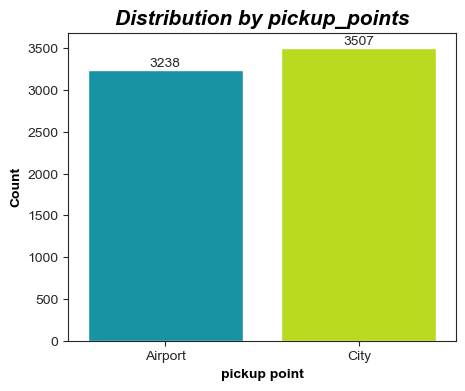

In [32]:
plt.figure(figsize=(5,4))
sns.set_style('ticks')
ax=sns.countplot(x='Pickup point',data=df,palette='nipy_spectral',color='black')

plt.title('Distribution by pickup_points',color='black',fontsize=15,fontweight='bold',fontstyle='italic')
plt.xlabel('pickup point',color='black',fontweight='bold')
plt.ylabel('Count',color='black',fontweight='bold')
#sns.set_context("paper")

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

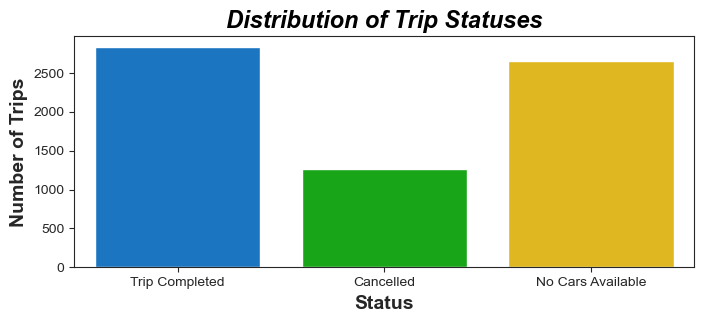

In [34]:
plt.figure(figsize=(8,3))
sns.countplot(x='Status', data=df,palette='nipy_spectral')
plt.title('Distribution of Trip Statuses',fontsize=17,fontweight='bold',fontstyle='italic',color='black')
plt.xlabel('Status',fontweight='bold',fontsize=14)
plt.ylabel('Number of Trips',fontweight='bold',fontsize=14)
plt.show()

In [36]:
df["Pickup point"].value_counts()


Pickup point
City       3507
Airport    3238
Name: count, dtype: int64

In [37]:
df["Month"].value_counts()

Month
7     4071
11    1367
12    1307
Name: count, dtype: int64

In [38]:
df.groupby(["Pickup point"]).mean(numeric_only=True)

,Request id,Driver id,Date,Month,Pickup_Hour,Pickup_Minutes,Drop_Hour,Drop_Minutes
Pickup point,,,,,,,,
Airport,3455.450896,227.555899,11.081841,8.872761,15.500000,29.490426,10.567943,45.042928
City,3319.270031,191.155403,11.369547,8.693470,10.608497,29.651839,10.683490,44.857143


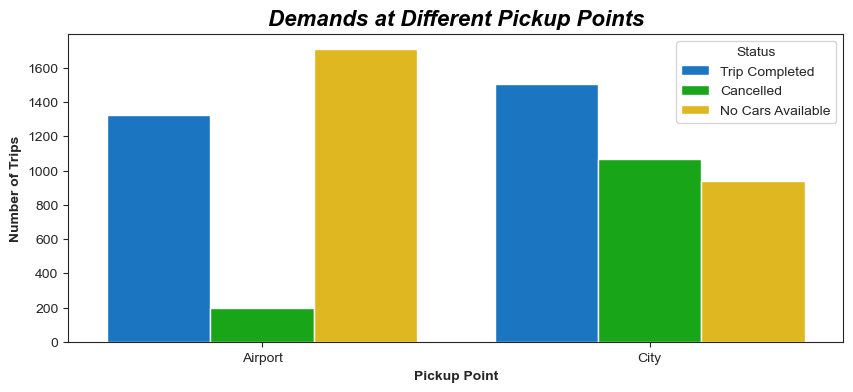

In [39]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Pickup point', hue='Status', data=df,palette='nipy_spectral')
plt.title('Demands at Different Pickup Points',fontweight='bold',fontsize=16,color='black',fontstyle='italic')
plt.xlabel('Pickup Point',fontweight='bold')
plt.ylabel('Number of Trips',fontweight='bold')
plt.show()

In [40]:
def categorize_hour(hour):
    if hour >= 5 and hour <= 11:
        return "Morning"
    elif hour >= 12 and hour <= 16:
        return "Afternoon"
    elif hour >= 17 and hour <= 23:
        return "Evening"
    else:
        return "Night"

In [41]:
df['Pickup_Hour'] = df['Pickup_Hour'].apply(categorize_hour)
df['Drop_Hour'] = df['Drop_Hour'].apply(categorize_hour)
df



,Request id,Pickup point,Driver id,Status,Request_date,Request_time,Date,Month,Pickup_Hour,Pickup_Minutes,Drop_Hour,Drop_Minutes
0,619,Airport,1.0,Trip Completed,11/7/2016,11:51,7,11,Morning,51,Afternoon,0
1,867,Airport,1.0,Trip Completed,11/7/2016,17:57,7,11,Evening,57,Evening,47
2,1807,City,1.0,Trip Completed,12/7/2016,9:17,7,12,Morning,17,Morning,58
3,2532,Airport,1.0,Trip Completed,12/7/2016,21:08,7,12,Evening,8,Evening,3
4,3112,City,1.0,Trip Completed,13/07/2016,08:33:16,13,7,Morning,33,Morning,25
...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,300.0,No Cars Available,15/07/2016,23:49:03,15,7,Evening,49,Morning,56
6741,6752,Airport,300.0,No Cars Available,15/07/2016,23:50:05,15,7,Evening,50,Morning,56
6742,6751,City,300.0,No Cars Available,15/07/2016,23:52:06,15,7,Evening,52,Morning,56
6743,6754,City,300.0,No Cars Available,15/07/2016,23:54:39,15,7,Evening,54,Morning,56


In [42]:
hourly_distribution = df.groupby('Pickup_Hour').size().reset_index(name='Count')

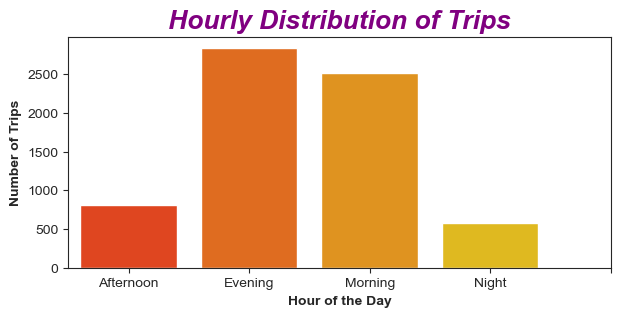

In [43]:
plt.figure(figsize=(7,3))
sns.barplot(x='Pickup_Hour', y='Count', data=hourly_distribution,palette='autumn')
plt.title('Hourly Distribution of Trips',fontweight='bold',fontsize=19,color='purple',fontstyle='italic')
plt.xlabel('Hour of the Day',fontweight='bold')
plt.ylabel('Number of Trips',fontweight='bold')
plt.xticks(range(0, 5))
plt.show()

 Conclusion

   1. Hourly Distribution: The heatmap likely reveals which hours of the day (categorized as Morning, Afternoon, Evening, and Night) have the highest and lowest number of Uber requests at different pickup points (Airport or City).

   2. Peak Hours: If the heatmap shows darker colors (indicating higher counts) during specific times at certain pickup points, those are the peak hours. For example, there might be more requests from the Airport in the Morning, while City requests might peak in the Morning.



 Recommendations:

Morning and Evening Peaks: Allocate more drivers to the Airport during Evening to meet the higher demand.

City Peak: If the City shows a significant increase in requests during the Morning, ensure adequate driver availability in those areas during those times.

Driver Scheduling: Adjust driver schedules to align with peak demand times, ensuring that more drivers are available during periods of high demand.
